In [4]:
import html5lib
from bs4 import BeautifulSoup
from selenium import webdriver
from datetime import date, timedelta
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# Install chromedriver: https://chromedriver.chromium.org/getting-started

num_top=15 #top 15 contributors
days_range=1*365 #look back 1 year

# Choosing timeframe on Github's contributons tab
range_end=date.today()
range_start=range_end-timedelta(days=days_range)
url=f"https://github.com/openstack/nova/graphs/contributors?from={range_start}&to={range_end}&type=c"
print("Link being scrapped to view contributions: ", url)

# Setting up headless webdriver
chromeOptions = Options()
chromeOptions.headless = True
driver = webdriver.Chrome(options=chromeOptions)
driver.get(url)

# Wait till contributions are loaded and save to html file
try:
    element = WebDriverWait(driver, 30).until(
        EC.visibility_of_element_located((By.CLASS_NAME, "contrib-person")))
    soup = BeautifulSoup(driver.page_source, 'html5lib')

    with open("openstack_nova_contributions.html", "wb") as file:
        file.write(soup.prettify("utf-8"))
    print("Successfully scrapped page")
    
finally:
    driver.quit()

Link being scrapped to view contributions: https://github.com/openstack/nova/graphs/contributors?from=2020-02-09&to=2021-02-08&type=c
Done


In [7]:
names=[] #list of contributors
commits=[] #list of number of commits
for i in range (1, num_top):
    all_contrib=soup.find_all("li",class_="contrib-person") #find all contributors
    name=all_contrib[i].find("a",class_="text-normal").getText() #get contributor names
    commit=int(all_contrib[i].find("a",class_="link-gray text-normal").getText().strip(" commits")) #get number of commits
    names.append(name)
    commits.append(commit)

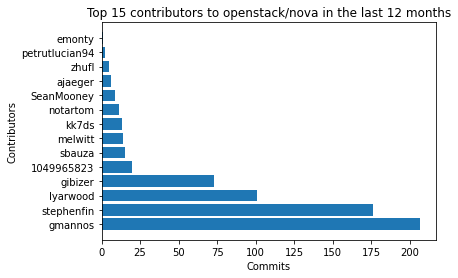

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
x_ax = [i for i, _ in enumerate(names)]
plt.barh(x_ax, commits) #using horizontal barchart to display complete usernames
plt.ylabel("Contributors")
plt.xlabel("Commits")
plt.title("Top 15 contributors to openstack/nova in the last 12 months")
plt.yticks(x_ax, names)
plt.savefig('top_contributors.jpg', dpi=300,bbox_inches='tight') #save plot to file
plt.show()
